# download example 

- https://pdal.io/tutorial/iowa-entwine.html


- https://gist.githubusercontent.com/hobu/ee22084e24ed7e3c0d10600798a94c31/raw/107a16724e79c71c8a26b299ecdcf4737e77afcd/gistfile1.txt

In [1]:
#! wget https://gist.githubusercontent.com/hobu/ee22084e24ed7e3c0d10600798a94c31/raw/107a16724e79c71c8a26b299ecdcf4737e77afcd/gistfile1.txt

In [10]:
! cat simplify.txt

{
    "pipeline": [
        {
"bounds": "([-10425171.940, -10423171.940], [5164494.710, 5166494.710])",
"filename": "https://s3-us-west-2.amazonaws.com/usgs-lidar-public/IA_NorthCentral_2_2020/ept.json",
"type": "readers.ept",
"tag": "readdata"
        },
        {
            "out_srs": "EPSG:26915",
            "tag": "reprojectUTM",
            "type": "filters.reprojection"
        },
        {
            "filename": "simpleiowa.laz",
            "inputs": [ "reprojectUTM" ],
            "tag": "writerslas",
            "type": "writers.las"
        }
    ]
}


In [11]:
! cp simplify.txt simplify_iowa_pdal_pipeline.json

In [12]:
! pdal pipeline simplify_iowa_pdal_pipeline.json --debug

(PDAL Debug) Debugging...
(pdal pipeline readers.ept Debug) Query bounds: ([-10425171.94, -10423171.94], [5164494.71, 5166494.71], [-1.797693134862316e+308, 1.797693134862316e+308])
Threads: 15
(pdal pipeline Debug) Executing pipeline in stream mode.
(pdal pipeline writers.las Debug) Wrote 7311121 points to the LAS file


In [13]:
! mv simpleiowa.laz  ~/ia

In [14]:
! docker image ls

REPOSITORY                  TAG       IMAGE ID       CREATED         SIZE
connormanning/entwine       latest    0ad5f7215868   19 months ago   1.8GB
connormanning/http-server   latest    10888664627c   3 years ago     72.7MB


In [16]:
# convert with conner manning

! docker run -it -v /home/ec2-user/ia:/entwine connormanning/entwine build -i /entwine/simpleiowa.laz -o /entwine/SIMPLEIOWA

1/1: /entwine/simpleiowa.laz
Dimensions: [
        X:int32, Y:int32, Z:int32, Intensity:uint16, ReturnNumber:uint8,
        NumberOfReturns:uint8, ScanDirectionFlag:uint8, EdgeOfFlightLine:uint8,
        Classification:uint8, ScanAngleRank:float32, UserData:uint8,
        PointSourceId:uint16, GpsTime:float64, Red:uint16, Green:uint16, Blue:uint16
]
Points: 7,311,121
Bounds: [(446112, 4652575, 269), (447611, 4654068, 349)]
Scale: 0.01
SRS: EPSG:26915

Adding 0 - /entwine/simpleiowa.laz
Joining
00:10 - 71% - 5,201,920 - 1,872 (1,872) M/h - 0W - 0R - 122A
	Done 0
00:20 - 100% - 7,311,121 - 1,316 (759) M/h - 135W - 0R - 47A
Saving
Wrote 7,311,121 points.


In [17]:
! pdal info /home/ec2-user/ia/simpleiowa.laz

{
  "file_size": 35074232,
  "filename": "/home/ec2-user/ia/simpleiowa.laz",
  "now": "2022-05-05T01:02:41+0000",
  "pdal_version": "2.4.0 (git-version: 997a1c)",
  "reader": "readers.las",
  "stats":
  {
    "bbox":
    {
      "EPSG:4326":
      {
        "bbox":
        {
          "maxx": -93.6328147,
          "maxy": 42.03690795,
          "maxz": 348.06,
          "minx": -93.65104856,
          "miny": 42.0233631,
          "minz": 269.07
        },
        "boundary": { "type": "Polygon", "coordinates": [ [ [ -93.650911214122431, 42.023363103109688, 269.07 ], [ -93.651048560326345, 42.036806844777033, 269.07 ], [ -93.632948221380587, 42.036907951738264, 348.06 ], [ -93.632814699386628, 42.023464182878712, 348.06 ], [ -93.650911214122431, 42.023363103109688, 269.07 ] ] ] }
      },
      "native":
      {
        "bbox":
        {
          "maxx": 447610.65,
          "maxy": 4654067.85,
          "maxz": 348.06,
          "minx": 446112.37,
          "miny": 4652575.13,
     

In [18]:
! ls ~/ia/SIMPLEIOWA

ept-build.json	ept-data  ept-hierarchy  ept.json  ept-sources


In [19]:
# use connor manning http server on port 80

! docker run -it -v ~/ia:/var/www -p 8080:8080 connormanning/http-server

docker: Error response from daemon: driver failed programming external connectivity on endpoint vigilant_edison (532ace8a8f7afeac9a39be882eba14127ca2cae577a0c8281fd3762b55f76b25): Bind for 0.0.0.0:8080 failed: port is already allocated.


[vizit](https://potree.entwine.io/data/custom.html?r=http://10.12.71.190/IOWA/ept.json)

- https://potree.entwine.io/data/custom.html?r=http://localhost:8080/SIMPLEIOWA/ept.json

In [40]:
#! wget https://potree.entwine.io/data/custom.html

--2022-05-02 23:35:30--  https://potree.entwine.io/data/custom.html
Resolving potree.entwine.io (potree.entwine.io)... 99.84.66.109, 99.84.66.33, 99.84.66.78, ...
Connecting to potree.entwine.io (potree.entwine.io)|99.84.66.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2420 (2.4K) [text/html]
Saving to: ‘custom.html’

100%[======================================>] 2,420       --.-K/s   in 0s      

2022-05-02 23:35:30 (225 MB/s) - ‘custom.html’ saved [2420/2420]



In [ ]:
#!cat custom.html

In [42]:
#! wget  https://potree.entwine.io/js/script.js

--2022-05-03 00:03:35--  https://potree.entwine.io/js/script.js
Resolving potree.entwine.io (potree.entwine.io)... 99.84.66.109, 99.84.66.74, 99.84.66.78, ...
Connecting to potree.entwine.io (potree.entwine.io)|99.84.66.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15530 (15K) [application/javascript]
Saving to: ‘script.js’

100%[======================================>] 15,530      --.-K/s   in 0s      

2022-05-03 00:03:36 (315 MB/s) - ‘script.js’ saved [15530/15530]



In [43]:
#!cat script.js

var maybeParse = function(key, val) {
    if (['r', 'resource', 'location'].includes(key)) {
        if (val[0] == '[') return JSON.parse(val);
        if (val[0] != '"') return val;
    }
    return JSON.parse(val);
};

var queryParam = function(name) {
    name = name.replace(/[\[\]]/g, '\\$&');
    var regex = new RegExp('[?&]' + name + '(=([^&#]*)|&|#|$)');
    var results = regex.exec(window.location.href);
    if (!results) return null;
    if (!results[2]) return true;

    return maybeParse(name, decodeURIComponent(results[2].replace(/\+/g, ' ')));
}

var Vec = (x, y, z) => {
    if (Array.isArray(x)) return new THREE.Vector3(x[0], x[1], x[2]);
    else return new THREE.Vector3(x, y, z);
};

var addAnnotation = (v) => {
    viewer.scene.addAnnotation(Vec(v.pos), {
        title: v.name,
        cameraPosition: Vec(v.cpos),
        cameraTarget: Vec(v.ctgt),
        actions: v.actions
    });
};

var mobileRegex =
    /Android|webOS|iPhone|iPad|iPod|BlackBerry|IEMobile|Opera Min

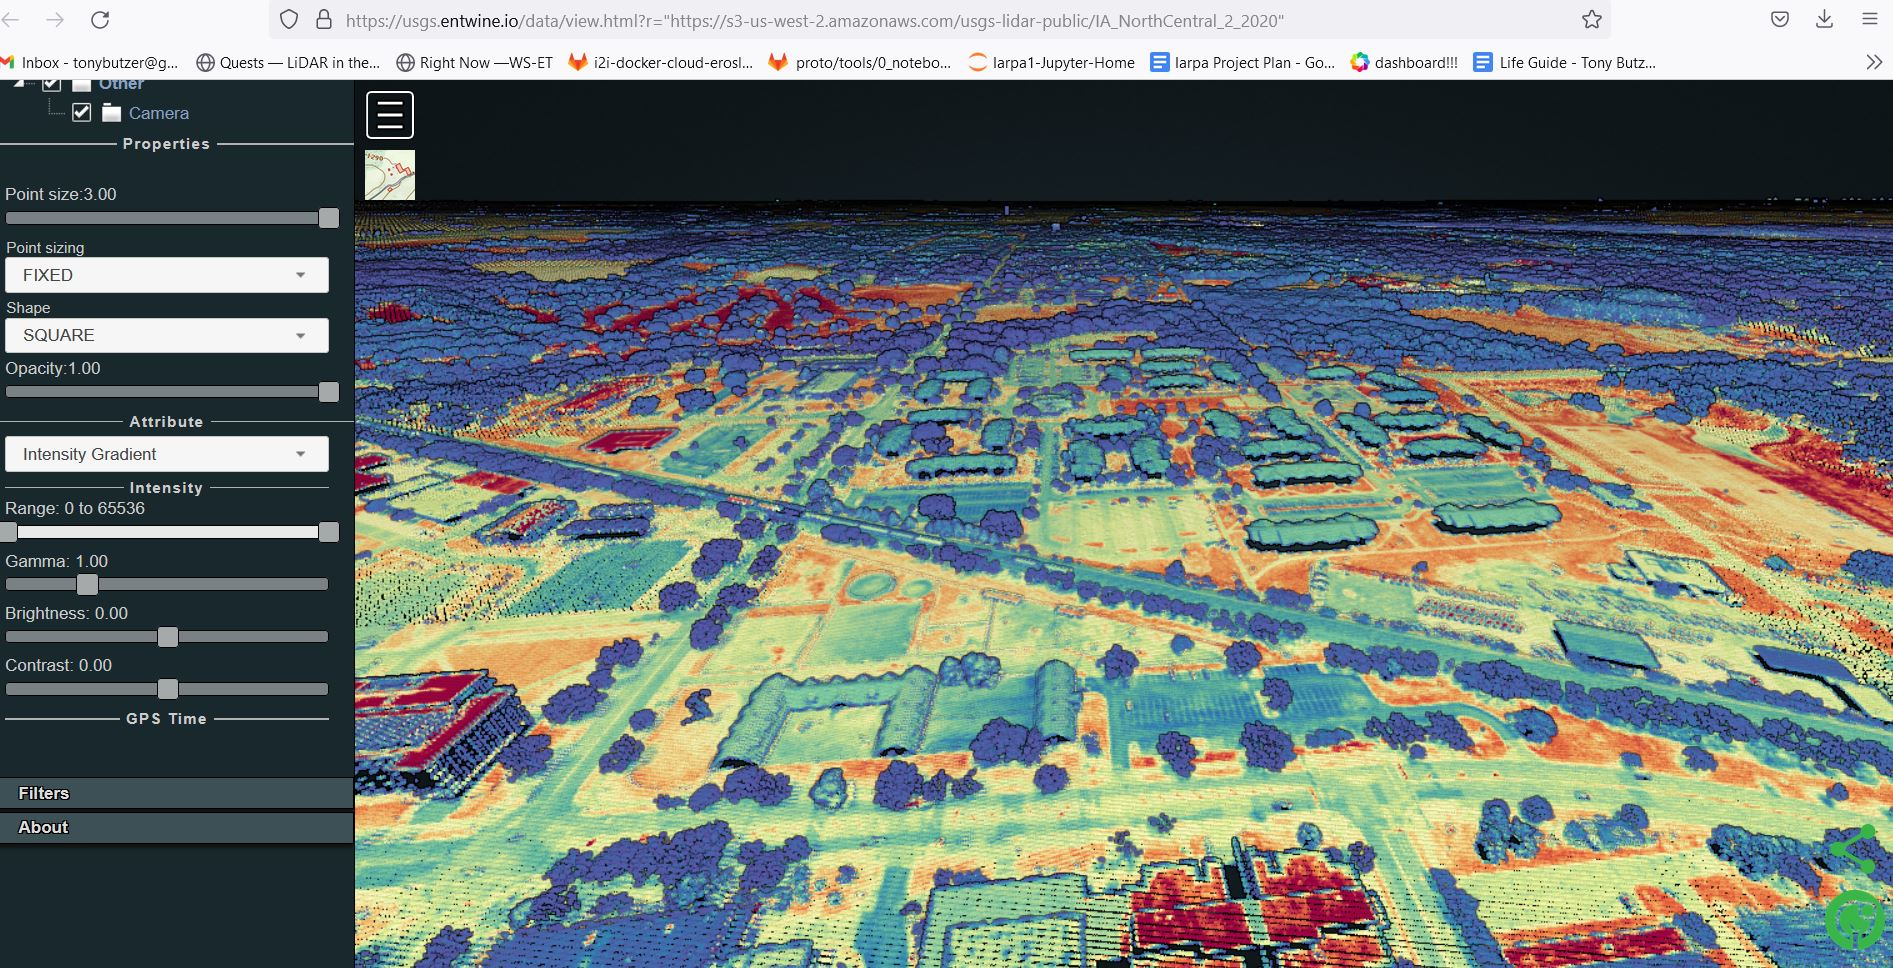

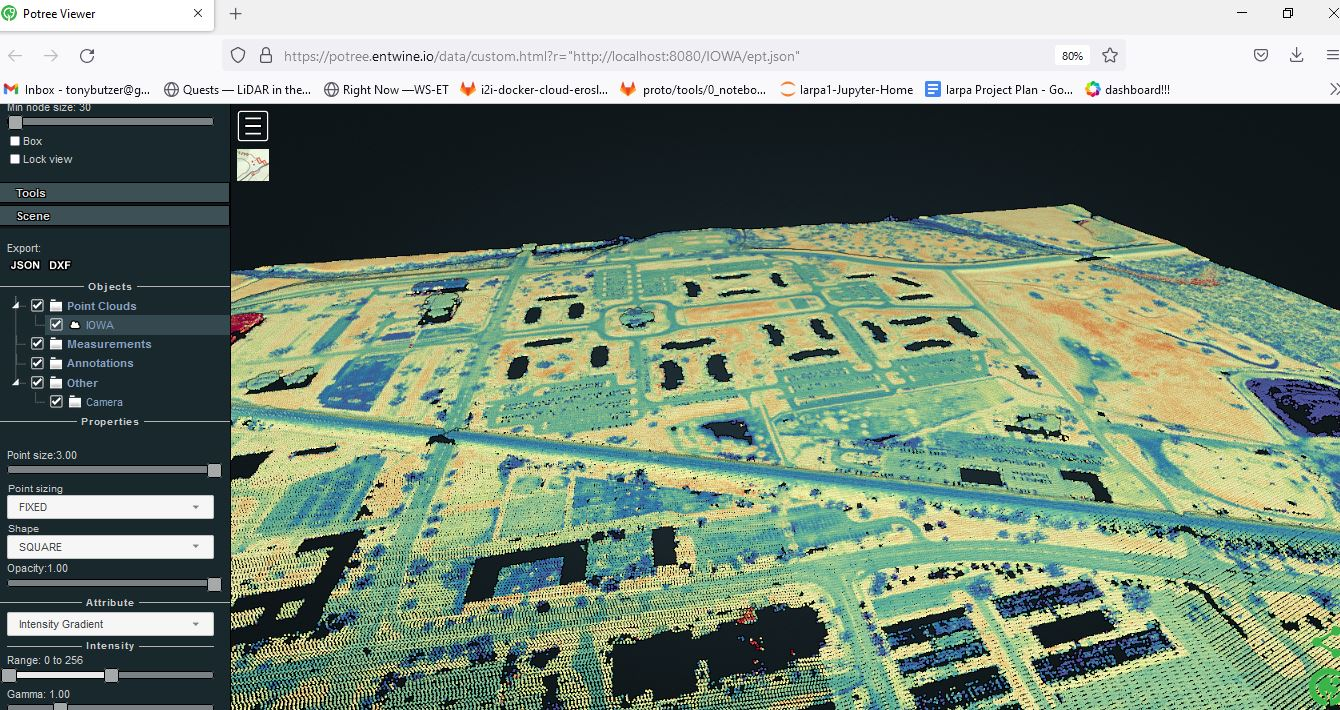

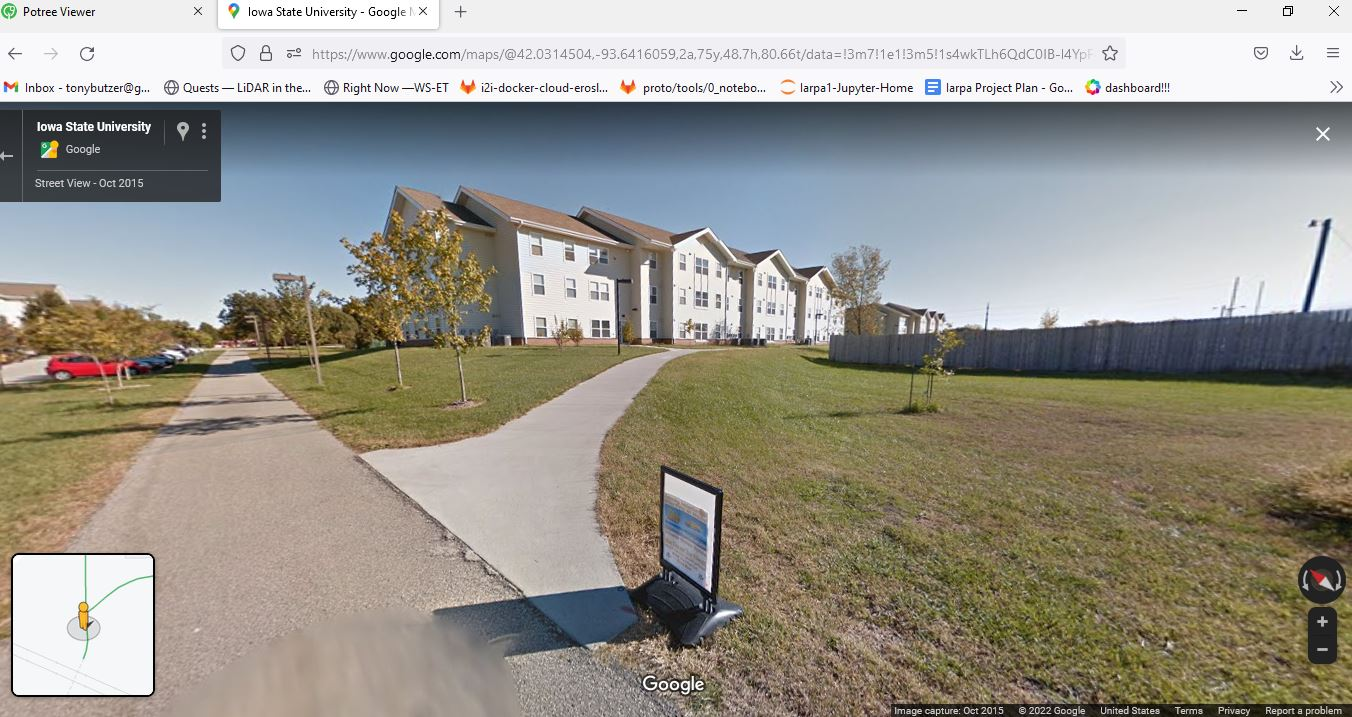

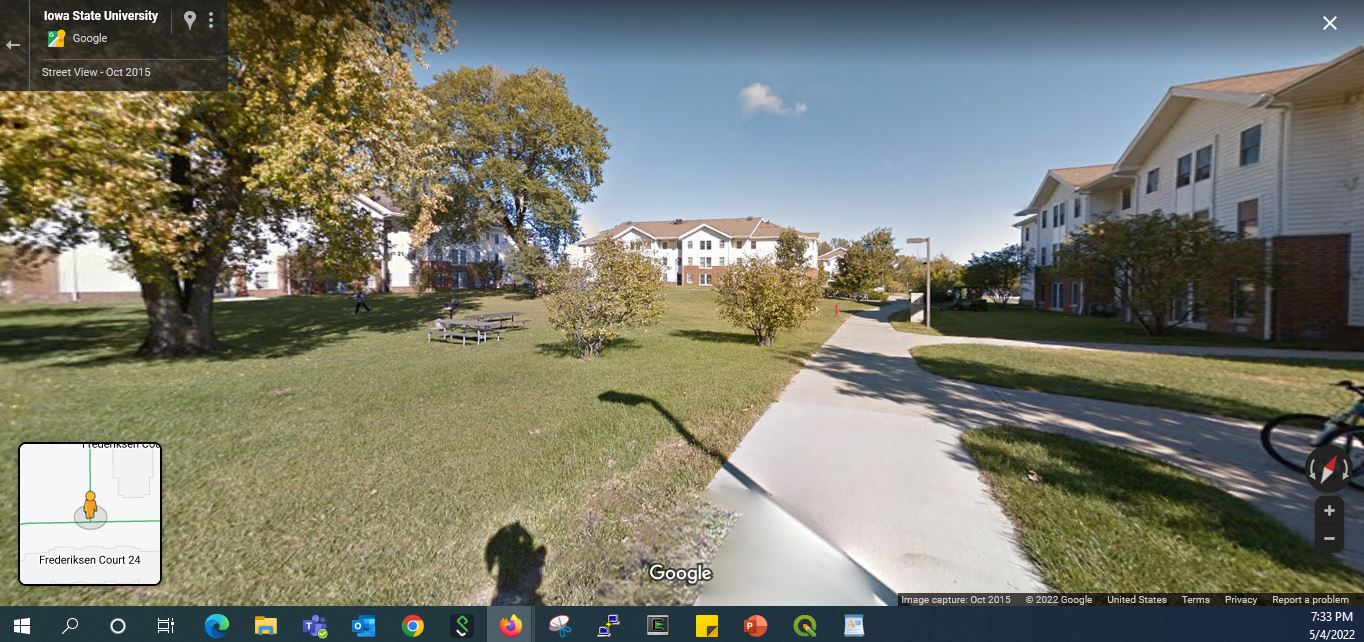